## Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns

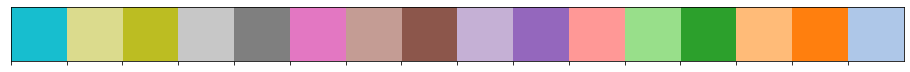

In [2]:
colors = sns.color_palette("tab20_r", 16)
sns.palplot(colors)
sns.set_style("darkgrid")

In [3]:
cwd = os.getcwd()

In [4]:
def image_path(name):
    path = cwd + name
    return path

## Resources
General: 
1. Hands on Machine Learning with scikit-learn and tensorflow, chapter 5, 6, 7

2. Machine Learnia : https://www.youtube.com/watch?v=w_bLGK4Pteo

Extra ressources fo algorithms:
- Arbres de décision: 
1. https://scikit-learn.org/stable/modules/tree.html
2. https://www.lovelyanalytics.com/2016/08/16/decision-tree-comment-ca-marche/
- Random forest:
1. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
2. https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
- SVM: 
1. https://scikit-learn.org/stable/modules/svm.html


Courbes d'apprentissage: 
1. https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
2. https://towardsdatascience.com/why-you-should-be-plotting-learning-curves-in-your-next-machine-learning-project-221bae60c53

Courbes de validation: 
1. https://scikit-learn.org/stable/modules/learning_curve.html

- Take some time to read book sections for decision tree, random forest and SVM algorithms.
- Import these algorithms from scikit-learn and find the hyperparameter options that are available when they are instantiated.


## Decision trees

Cet algorithme va classer 

In [5]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [6]:
# Load dataset
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

In [7]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

### Visualization: export_graphviz

In [8]:
from sklearn.tree import export_graphviz
import graphviz

In [9]:
def convert_png(file, output_name):
    with open(file) as f:
        dot_graph = f.read()

    # Convert the .dot file to a .png file
    graphviz.Source(dot_graph).render(filename=output_name, format="png")

In [10]:
out_file = image_path("iris_tree.dot")

export_graphviz(
       tree_clf,
       out_file=out_file,
       feature_names=iris.feature_names[2:],
       class_names=iris.target_names,
       rounded=True,
       filled=True
   )

In [11]:
# open image with PIL
#from PIL import Image
#image = Image.open("/Users/manulabricole/Documents/CDN/MachineLearning/ML3/iris_tree.png")
#image.show()

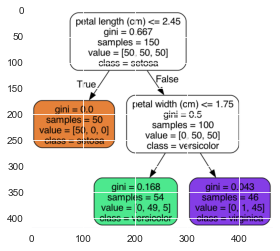

In [12]:
# open image with matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('/Users/manulabricole/Documents/CDN/MachineLearning/ML3/iris_tree.png')
imgplot = plt.imshow(img)


### Visualization: plot_tree

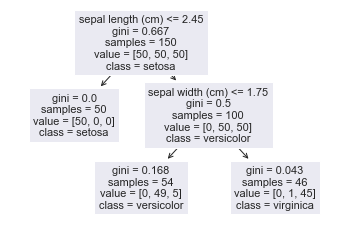

In [13]:
from sklearn.tree import plot_tree
plot = plot_tree(tree_clf, feature_names = iris.feature_names[:2], class_names = iris.target_names)

Compute the predictions of a decision tree classifier on a test set and calculate all the classification metrics you know:


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
y= iris_df.pop('target')
X=iris_df

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

std = StandardScaler()

X_train_scale = std.fit_transform(X_train)
X_test_scale = std.transform(X_test)

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_train_scale, y_train)

y_train_predict = tree_clf.predict(X_train_scale)
y_test_predict = tree_clf.predict(X_test_scale)

 For example, suppose you have found a flower whose petals are 5 cm long and 1.5 cm wide. The corre‐ sponding leaf node is the depth-2 left node, so the Decision Tree should output the following probabilities: 0% for Iris-Setosa (0/54), 90.7% for Iris-Versicolor (49/54), and 9.3% for Iris-Virginica (5/54).

In [17]:
# tree_clf.predict_proba([[5, 1.5]])

In [18]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, make_scorer, roc_auc_score, log_loss

In [19]:
def print_score_method(y_train, y_train_predict, y_test, y_test_predict, method):
    
    print(f"---------------- {method} ------------------")
    print("")
    print("Accuracy Test --> ",accuracy_score(y_test, y_test_predict))
    print("Accuracy Train --> ",accuracy_score(y_train, y_train_predict))
    print("")    
    print("Precision Test --> ",precision_score(y_test, y_test_predict, average=method))
    print("Precision Train --> ",precision_score(y_train, y_train_predict, average=method))
    print("")
    print("Recall Test --> ",recall_score(y_test, y_test_predict, average=method))
    print("Recall Train --> ",recall_score(y_train, y_train_predict, average=method))
    print("")
    print("f1 Test --> ",f1_score(y_test, y_test_predict, average=method))
    print("f1 Train --> ",f1_score(y_train, y_train_predict, average=method))
    print("------------------------------------------")

/var/folders/vs/63szyqqn4dq91nzk275599p40000gn/T/ipykernel_28751/3388077521.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


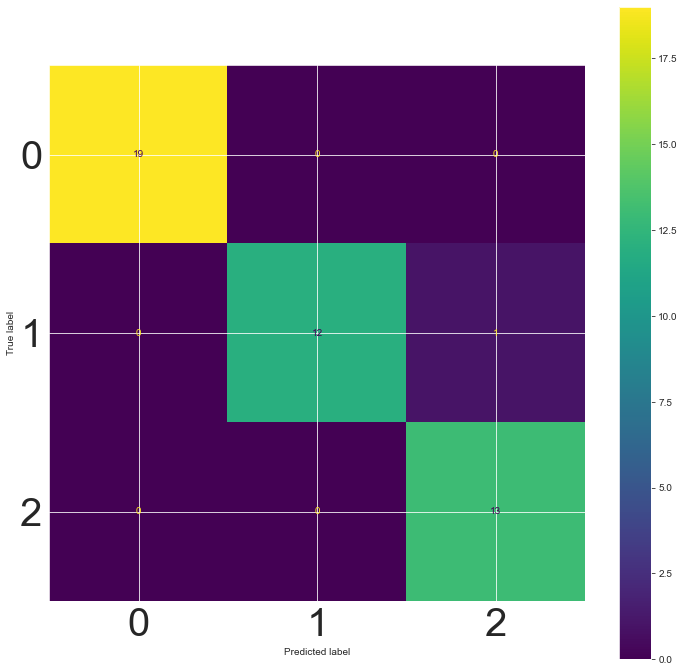

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_predict)
cm_display = ConfusionMatrixDisplay(cm)

fig, ax = plt.subplots(figsize=(12, 12))
cm_display.plot(ax=ax)
plt.xticks(rotation=0, fontsize=40)
plt.yticks(fontsize=40)
fig.show()

In [21]:
methods = ['micro', 'macro', 'weighted']

for method in methods:
    print_score_method(y_train, y_train_predict, y_test, y_test_predict, method)

---------------- micro ------------------

Accuracy Test -->  0.9777777777777777
Accuracy Train -->  0.9428571428571428

Precision Test -->  0.9777777777777777
Precision Train -->  0.9428571428571428

Recall Test -->  0.9777777777777777
Recall Train -->  0.9428571428571428

f1 Test -->  0.9777777777777777
f1 Train -->  0.9428571428571428
------------------------------------------
---------------- macro ------------------

Accuracy Test -->  0.9777777777777777
Accuracy Train -->  0.9428571428571428

Precision Test -->  0.9761904761904763
Precision Train -->  0.9492485833949248

Recall Test -->  0.9743589743589745
Recall Train -->  0.9459459459459459

f1 Test -->  0.974320987654321
f1 Train -->  0.9457875457875456
------------------------------------------
---------------- weighted ------------------

Accuracy Test -->  0.9777777777777777
Accuracy Train -->  0.9428571428571428

Precision Test -->  0.9793650793650793
Precision Train -->  0.9463485024460634

Recall Test -->  0.977777777777

## Random forests

Explain here how they work in your own words:

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [23]:
rfc = RandomForestClassifier(max_depth=2, n_estimators=1000, random_state=42)

In [24]:
rfc.fit(X_train_scale, y_train)

y_train_predict_rfc = tree_clf.predict(X_train_scale)
y_test_predict_rfc = tree_clf.predict(X_test_scale)

In [25]:
print(f"---------------- {method} ------------------")
print("")
print("Accuracy Test --> ",accuracy_score(y_test, y_test_predict_rfc))
print("Accuracy Train --> ",accuracy_score(y_train, y_train_predict_rfc))
print("")    
print("Precision Test --> ",precision_score(y_test, y_test_predict_rfc, average="weighted"))
print("Precision Train --> ",precision_score(y_train, y_train_predict_rfc, average="weighted"))
print("")
print("Recall Test --> ",recall_score(y_test, y_test_predict_rfc, average="weighted"))
print("Recall Train --> ",recall_score(y_train, y_train_predict_rfc, average="weighted"))
print("")
print("f1 Test --> ",f1_score(y_test, y_test_predict_rfc, average="weighted"))
print("f1 Train --> ",f1_score(y_train, y_train_predict_rfc, average="weighted"))
print("------------------------------------------")

---------------- weighted ------------------

Accuracy Test -->  0.9777777777777777
Accuracy Train -->  0.9428571428571428

Precision Test -->  0.9793650793650793
Precision Train -->  0.9463485024460634

Recall Test -->  0.9777777777777777
Recall Train -->  0.9428571428571428

f1 Test -->  0.9777448559670783
f1 Train -->  0.9426896912611198
------------------------------------------


## SVM

Explain here how they work in your own words:

### SVC - Poly kernel

In [26]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [27]:
svc_clf = SVC(kernel="poly", degree=3, coef0=1, C=1)

In [28]:
svc_clf.fit(X_train_scale, y_train)

SVC(C=1, coef0=1, kernel='poly')

In [29]:
y_svm_train_predict = svc_clf.predict(X_train_scale)
y_svm_test_predict = svc_clf.predict(X_test_scale)

In [30]:
print(f"---------------- {method} ------------------")
print("")
print("Accuracy Test --> ",accuracy_score(y_test, y_svm_test_predict))
print("Accuracy Train --> ",accuracy_score(y_train, y_svm_train_predict))
print("")    
print("Precision Test --> ",precision_score(y_test, y_svm_test_predict, average="weighted"))
print("Precision Train --> ",precision_score(y_train, y_svm_train_predict, average="weighted"))
print("")
print("Recall Test --> ",recall_score(y_test, y_svm_test_predict, average="weighted"))
print("Recall Train --> ",recall_score(y_train, y_svm_train_predict, average="weighted"))
print("")
print("f1 Test --> ",f1_score(y_test, y_svm_test_predict, average="weighted"))
print("f1 Train --> ",f1_score(y_train, y_svm_train_predict, average="weighted"))
print("-------------------------------------------")

---------------- weighted ------------------

Accuracy Test -->  1.0
Accuracy Train -->  0.9809523809523809

Precision Test -->  1.0
Precision Train -->  0.9819291819291819

Recall Test -->  1.0
Recall Train -->  0.9809523809523809

f1 Test -->  1.0
f1 Train -->  0.9809384572542468
-------------------------------------------


### SVC - rbf kernel

In [31]:
svc_rbf = SVC(kernel="rbf", gamma=2, C=1)
svc_rbf.fit(X_train_scale, y_train)

y_svm_train_predict = svc_rbf.predict(X_train_scale)
y_svm_test_predict = svc_rbf.predict(X_test_scale)

print(f"---------------- {method} ------------------")
print("")
print("Accuracy Test --> ",accuracy_score(y_test, y_svm_test_predict))
print("Accuracy Train --> ",accuracy_score(y_train, y_svm_train_predict))
print("")    
print("Precision Test --> ",precision_score(y_test, y_svm_test_predict, average="weighted"))
print("Precision Train --> ",precision_score(y_train, y_svm_train_predict, average="weighted"))
print("")
print("Recall Test --> ",recall_score(y_test, y_svm_test_predict, average="weighted"))
print("Recall Train --> ",recall_score(y_train, y_svm_train_predict, average="weighted"))
print("")
print("f1 Test --> ",f1_score(y_test, y_svm_test_predict, average="weighted"))
print("f1 Train --> ",f1_score(y_train, y_svm_train_predict, average="weighted"))
print("-------------------------------------------")

---------------- weighted ------------------

Accuracy Test -->  1.0
Accuracy Train -->  0.9809523809523809

Precision Test -->  1.0
Precision Train -->  0.9819291819291819

Recall Test -->  1.0
Recall Train -->  0.9809523809523809

f1 Test -->  1.0
f1 Train -->  0.9809384572542468
-------------------------------------------


## Learning curves

### Book example

In [32]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

Change the method so that instead of having an incremental training set size going from 1 to the size of X_train, you have a fixed set of training sizes.
For example: 

training_set_sizes = np.linspace(2, len(X_train), len(X_train), dtype='int')

or 

training_set_sizes = [1, 10, 20, 30, 40, 50, 60, 70, 80]

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [35]:

def plot_learning_curves(model, X, y):
    train_errors, val_errors, x_axis = [], [], []
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    
    
    for m in range(1, len(X_train)):
        
        model.fit(X_train[:m], y_train[:m])
        
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        
        x_axis.append(m)
        
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(18,9))
    fig.suptitle(f"Convergence for {model}", fontsize=20)
        
    sns.lineplot(
        ax=ax,
        x=x_axis, 
        y=train_errors, 
        color=colors[0],
        label="train-error"
    )
    sns.lineplot(
        ax=ax,
        x=x_axis, 
        y=val_errors, 
        color=colors[2],
        label="test-error"
    )
    ax.set_ylabel("RMSE", fontsize=15)
    ax.set_xlabel("size of dataset for training", fontsize=15)


In [36]:
lin_reg = LinearRegression()

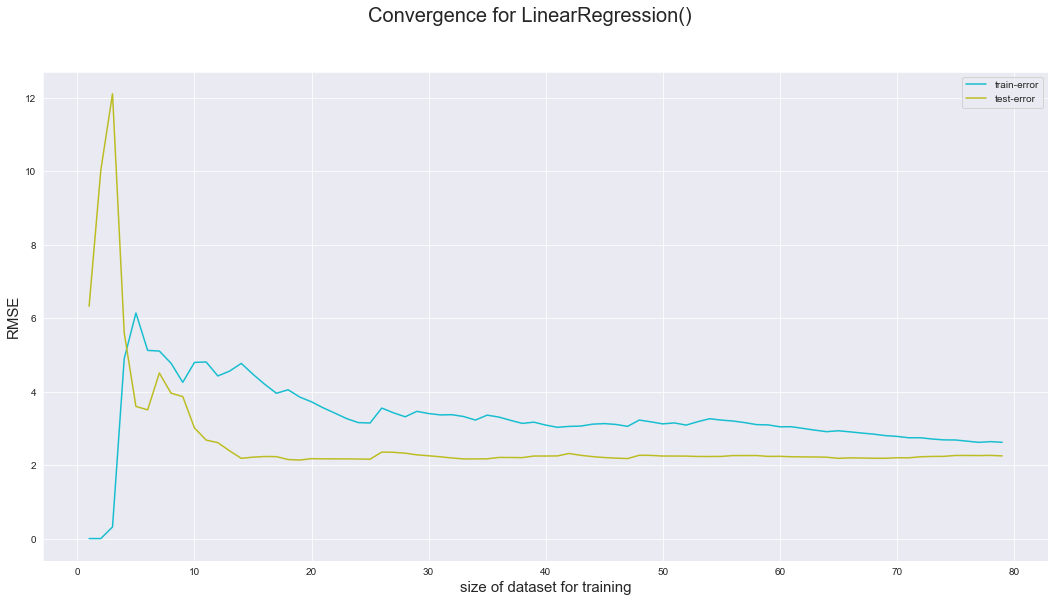

In [37]:
plot_learning_curves(lin_reg, X, y)

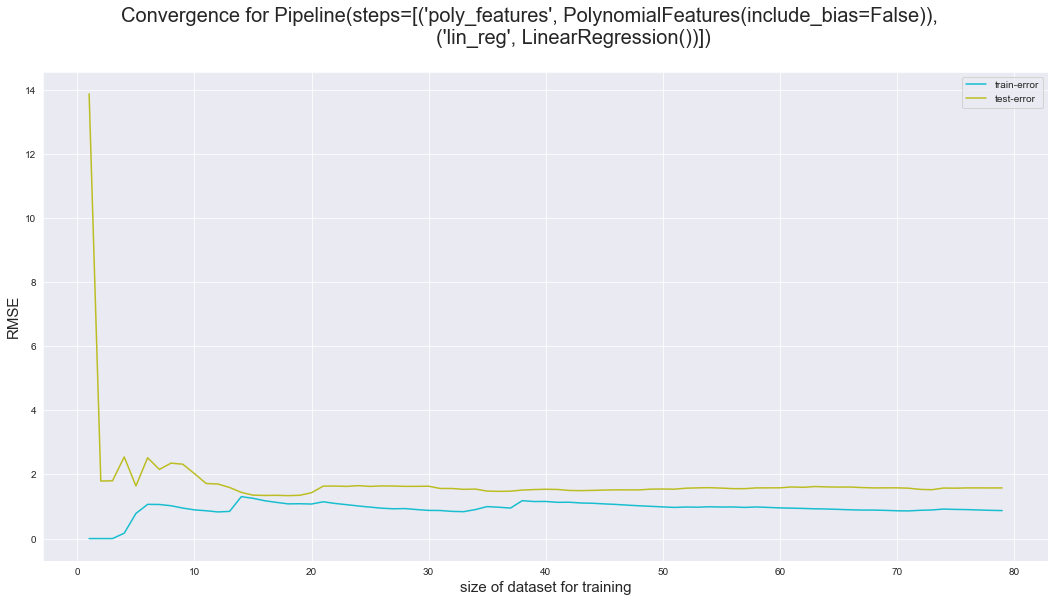

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)

In [39]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

## Learning curves for classifiers

Implement a ML problem on a dataset you have already seen in the course. 

Produce a plot of a model which shows signs of underfitting, and one that shows signs of overfitting.

In [69]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 50), score="accuracy"):
    
    plt.figure(figsize=(18,12))
    plt.title(title + f"{score}", fontsize=20)
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel(f"scoring : {score}")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, 
        X, 
        y, 
        cv=cv, 
        n_jobs=n_jobs, 
        train_sizes=train_sizes,
        scoring="accuracy"
    )
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    
    return plt



## Decision trees learning curves

In [41]:
dataset = pd.read_csv('../data/heart.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,0


In [42]:
y = dataset.pop("target")
X = dataset

In [43]:
X.isna().value_counts()

age    sex    cp     trestbps  chol   fbs    restecg  thalach  exang  oldpeak  slope  ca     thal 
False  False  False  False     False  False  False    False    False  False    False  False  False    303
dtype: int64

In [54]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


### Pipeline

In [47]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [48]:
multicategorical_features = ['cp', 'restecg', 'slope', 'ca', 'thal']
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [49]:
num_pipeline = Pipeline([
     ('std_scaler', StandardScaler()), # try commenting in this line and running fit_transform with and without it
 ])

cat_pipeline = Pipeline([
    ('ord_encoder', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))
])

full_pipeline = ColumnTransformer([
    ("continuous_pipe", num_pipeline, continuous_features),
    ("categorical_pipe", cat_pipeline, multicategorical_features)
])

In [50]:

full_tree_clf_15 = Pipeline([
    ("preprocessing", full_pipeline),
    ("model", DecisionTreeClassifier(max_depth=15))
])

full_tree_clf_100 = Pipeline([
    ("preprocessing", full_pipeline),
    ("model", DecisionTreeClassifier(max_depth=100))
])

<module 'matplotlib.pyplot' from '/Users/manulabricole/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

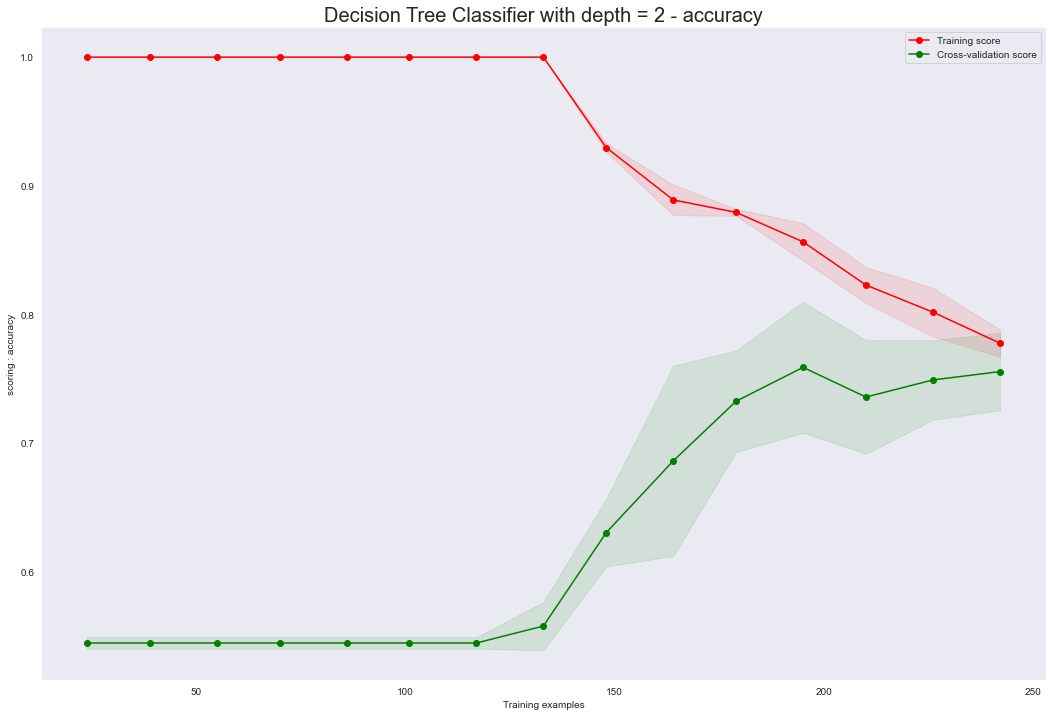

In [51]:
tree_clf = Pipeline([
    ("preprocessing", full_pipeline),
    ("model", DecisionTreeClassifier(max_depth=2))
])


plot_learning_curve(
    tree_clf, 
    "Decision Tree Classifier with depth = 2 - ", 
    X, 
    y, 
    ylim=None, 
    cv=5, 
    n_jobs=-1, 
    train_sizes=np.linspace(.1, 1.0, 15),
)

<module 'matplotlib.pyplot' from '/Users/manulabricole/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

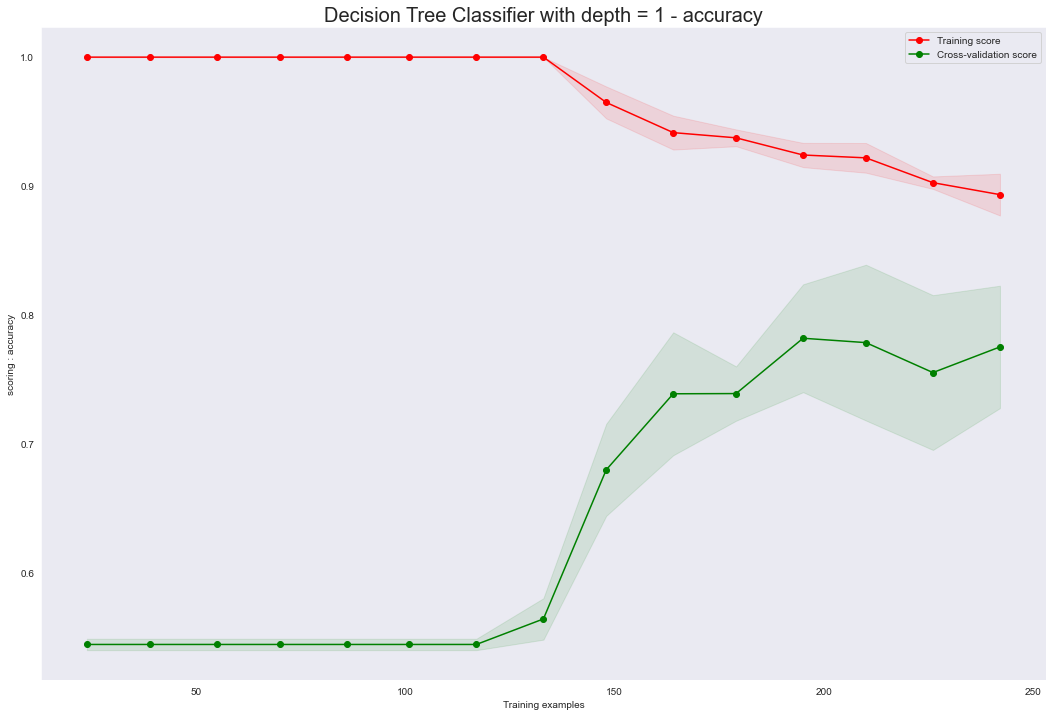

In [52]:
tree_clf = Pipeline([
    ("preprocessing", full_pipeline),
    ("model", DecisionTreeClassifier(max_depth=4))
])


plot_learning_curve(
    tree_clf, 
    "Decision Tree Classifier with depth = 1 - ", 
    X, 
    y, 
    ylim=None, 
    cv=5, 
    n_jobs=-1, 
    train_sizes=np.linspace(.1, 1.0, 15),
)

<module 'matplotlib.pyplot' from '/Users/manulabricole/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

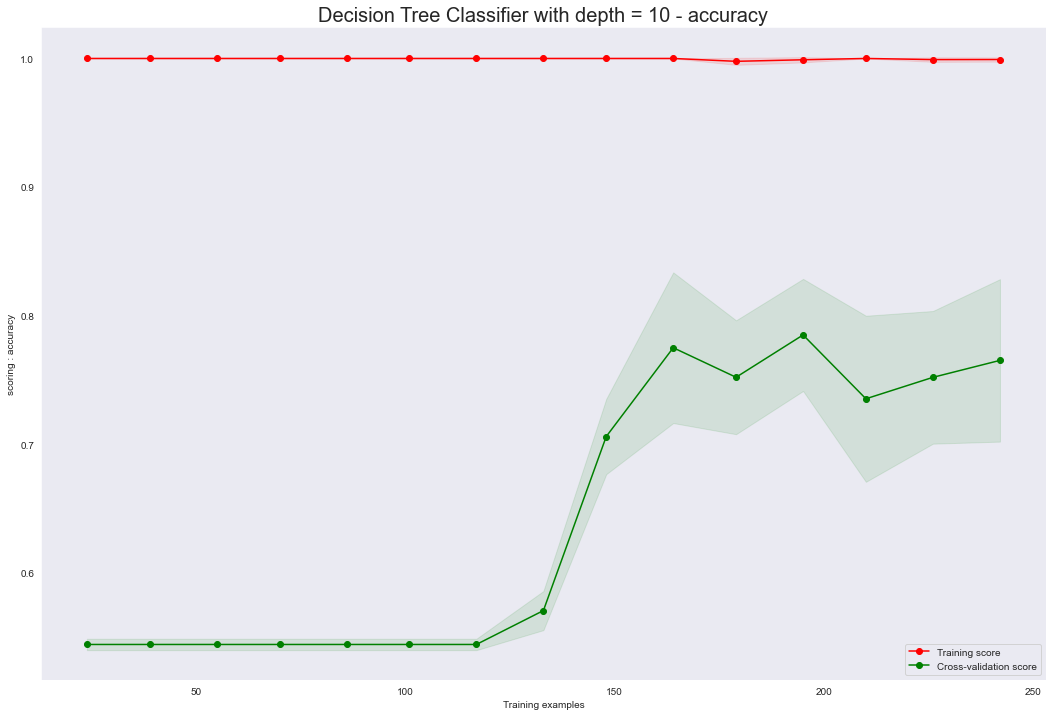

In [53]:
tree_clf = Pipeline([
    ("preprocessing", full_pipeline),
    ("model", DecisionTreeClassifier(max_depth=10))
])


plot_learning_curve(
    tree_clf, 
    "Decision Tree Classifier with depth = 10 - ", 
    X, 
    y, 
    ylim=None, 
    cv=5, 
    n_jobs=-1, 
    train_sizes=np.linspace(.1, 1.0, 15),
)

## Random forests classifier learning curves

### Underfit

<module 'matplotlib.pyplot' from '/Users/manulabricole/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

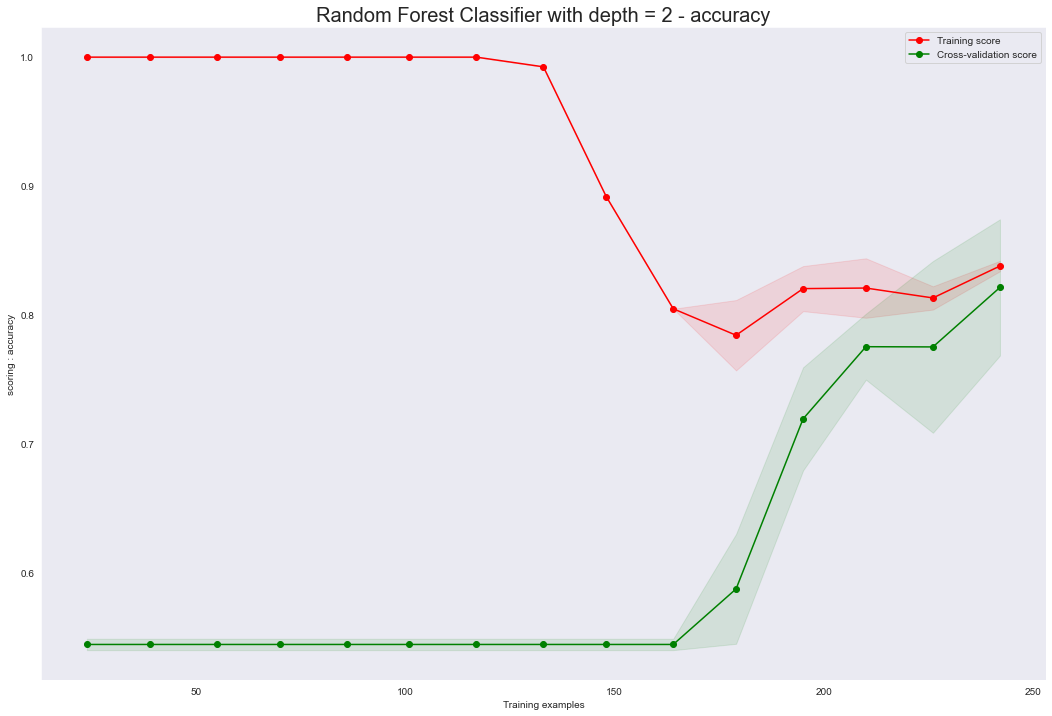

In [55]:
forest_clf = Pipeline([
    ("preprocessing", full_pipeline),
    ("model", RandomForestClassifier(max_depth=1, n_estimators=31))
])


plot_learning_curve(
    forest_clf, 
    "Random Forest Classifier with depth = 2 - ", 
    X, 
    y, 
    ylim=None, 
    cv=5, 
    n_jobs=-1, 
    train_sizes=np.linspace(.1, 1.0, 15),
)

### Overfit model

<module 'matplotlib.pyplot' from '/Users/manulabricole/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

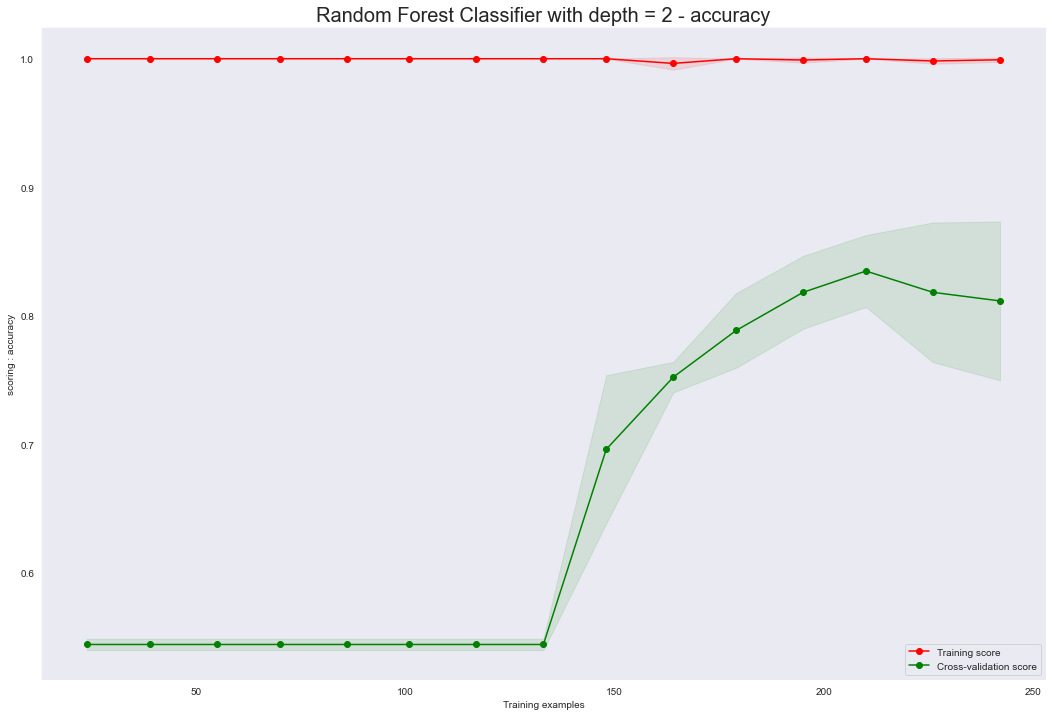

In [56]:
forest_clf = Pipeline([
    ("preprocessing", full_pipeline),
    ("model", RandomForestClassifier(max_depth=10, n_estimators=31))
])


plot_learning_curve(
    forest_clf, 
    "Random Forest Classifier with depth = 2 - ", 
    X, 
    y, 
    ylim=None, 
    cv=5, 
    n_jobs=-1, 
    train_sizes=np.linspace(.1, 1.0, 15),
)

### Optimization

<module 'matplotlib.pyplot' from '/Users/manulabricole/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

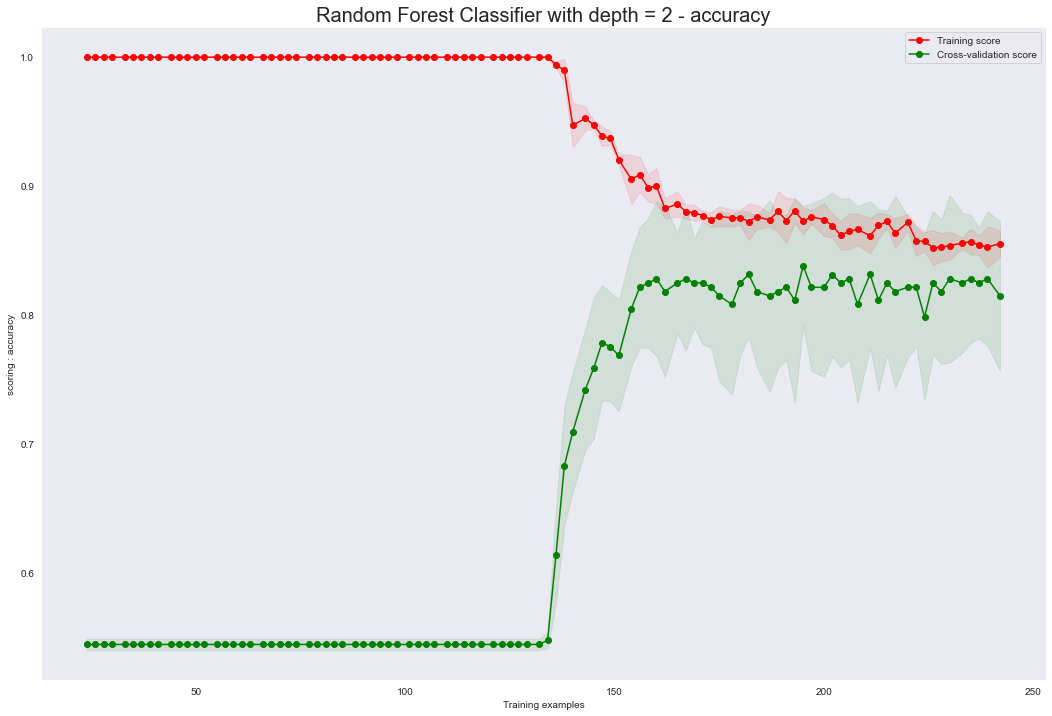

In [68]:
forest_clf = Pipeline([
    ("preprocessing", full_pipeline),
    ("model", RandomForestClassifier(max_depth=2, n_estimators=200, class_weight="balanced"))
])


plot_learning_curve(
    forest_clf, 
    "Random Forest Classifier with depth = 2 - ", 
    X, 
    y, 
    ylim=None, 
    cv=5, 
    n_jobs=-1, 
    train_sizes=np.linspace(.1, 1.0, 50),
)

## SVM

<module 'matplotlib.pyplot' from '/Users/manulabricole/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

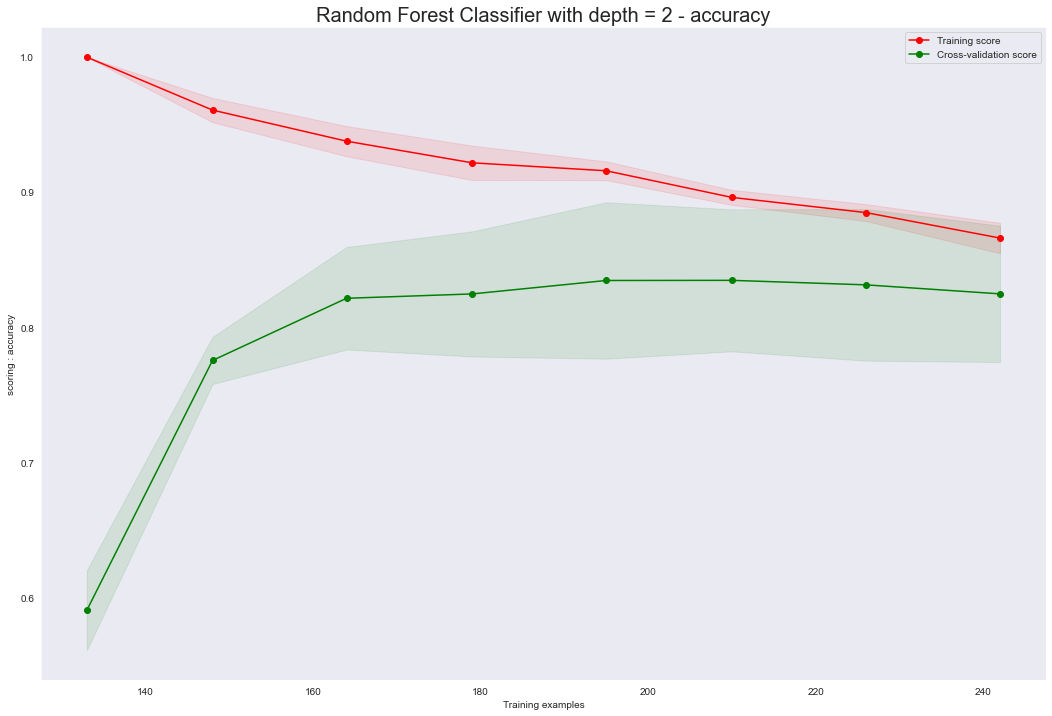

In [57]:
svm_clf = Pipeline([
    ("preprocessing", full_pipeline),
    ("model", SVC(kernel="linear"))
])


plot_learning_curve(
    svm_clf, 
    "Random Forest Classifier with depth = 2 - ", 
    X, 
    y, 
    ylim=None, 
    cv=5, 
    n_jobs=-1, 
    train_sizes=np.linspace(.1, 1.0, 15),
)

<module 'matplotlib.pyplot' from '/Users/manulabricole/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

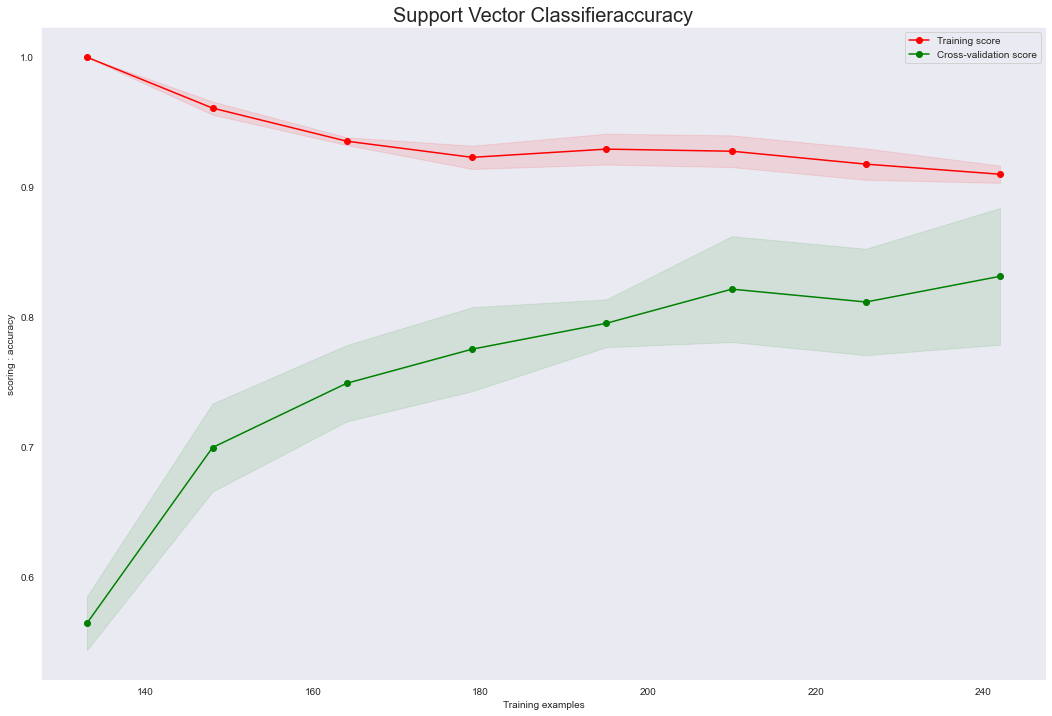

In [59]:
svm_clf = Pipeline([
    ("preprocessing", full_pipeline),
    ("model", SVC(kernel="poly", degree=2))
])


plot_learning_curve(
    svm_clf, 
    "Support Vector Classifier", 
    X, 
    y, 
    ylim=None, 
    cv=5, 
    n_jobs=-1, 
    train_sizes=np.linspace(.1, 1.0, 15),
)


https://towardsdatascience.com/a-brief-introduction-to-support-vector-machine-adf0f103a80f


SVM Advantages:

- SVM’s are very good when we have no idea on the data.
- Works well with even unstructured and semi structured data like text, Images and trees.
- The kernel trick is real strength of SVM. With an appropriate kernel function, we can solve any complex problem.
- Unlike in neural networks, SVM is not solved for local optima.
- It scales relatively well to high dimensional data.
- SVM models have good generalization in practice, the risk of over-fitting is less in SVM.

SVM Disadvantages:

- Choosing a “good” kernel function is not easy.
- Long training time for large datasets.
- Difficult to understand and interpret the final model, variable weights and individual impact.
- The SVM hyper parameters are Cost -C and gamma. It is not that easy to fine-tune these hyper-parameters. It is hard to visualize their impact

## Validation curves

Validation curves are a useful tool for improving the performance of a model by addressing issues such as overfitting or underfitting. Validation curves are related to learning curves, but instead of plotting the training and test accuracies as functions of the sample size, we vary the values of the model parameters. They are complementaru of GridSearch and make for a very nice visual tool for your algorithm optimization. 


In [ ]:
from sklearn.model_selection import validation_curve
def plot_validation_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, param_range=None, paran_name=None):

    # create your method to plot your learning curves using the sklearn method validation_curve()

    

Plot the validation curves for a chosen algorithm and vary 1 or 2 parameters of your choice.

Do a GridSearch and see if the most optimal parameter is coherent with what you see on your validation curves